In [1]:
import numpy as np

In [2]:
a = np.arange(1,10).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# Here 0 represents the column wise and 1 represents row here in numpy

In [5]:
a.mean(0)

array([4., 5., 6.])

In [17]:
b = np.array([True,True,False])
b

array([ True,  True, False])

In [18]:
b.any()

True

# Linear Regression

In [335]:
from sklearn.datasets import load_boston
boston = load_boston()

In [20]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [25]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [336]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [337]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [338]:
bos["Price"] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
bos.Price.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

# Keeping the Outliers

In [33]:
import sklearn

In [339]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [340]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [341]:
X = bos.iloc[:,:-1]
Y = bos.iloc[:,-1]

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state =0)

In [92]:
LR1 = LinearRegression()

In [93]:
LR.fit(X_train,Y_train)
LR1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
from sklearn import metrics

In [67]:
LR.intercept_

38.09169492630234

In [68]:
LR.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [94]:
y_pred = LR.predict(X_test)
y_pred1 = LR1.predict(X)

In [70]:
mae = metrics.mean_absolute_error(Y_test,y_pred)
mae

3.8429092204444983

In [71]:
mse = metrics.mean_squared_error(Y_test,y_pred)
mse

33.44897999767654

In [75]:
r2_score = metrics.r2_score(Y_test,y_pred)
r2_score

0.5892223849182507

In [73]:
np.sqrt(mse)

5.783509315085136

In [79]:
score_train = LR.score(X_train,Y_train)
score_train

0.7730135569264234

In [81]:
score_test = LR.score(X_test,Y_test)
score_test

0.5892223849182507

In [90]:
y_bar = np.mean(Y)
y_bar

22.532806324110698

In [95]:
sse = np.sum((Y-y_pred1)**2)
sse

11078.784577954977

# Overfitting from above data as train accuracy is greater than test accuracy

# Now Removig Outliers

In [83]:
q1 = bos.Price.quantile(0.25)
q3 = bos.Price.quantile(0.75)
IQR = q3-q1
lw = q1-(1.5*IQR)
uw = q3+(1.5*IQR)

In [96]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [151]:
X = df.drop(['mpg','model'],axis=1)
y= df[['mpg']]

In [152]:
LR = LinearRegression()
LR.fit(X,y)
y_pred_all = LR.predict(X)
r2_score_all = metrics.r2_score(y,y_pred_all)
r2_score_all

0.8690157644777647

In [158]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =1)

In [159]:
LR1 = LinearRegression()
LR1.fit(x_train,y_train)
y_pred = LR.predict(x_test)
r2_score_test = metrics.r2_score(y_test,y_pred)
print(r2_score_test)

0.9079295424419117


In [160]:
metrics.r2_score(y_test,y_pred)

0.9079295424419117

In [161]:
LR.score(x_train,y_train)

0.8328755432387189

In [182]:
import numpy as np
import pandas as pd

In [184]:
df = pd.read_csv('baseballs.csv')
#df.head()
cols = ['batting_avg','a','b','c','d','e']
df.columns = cols
df.head()

,batting_avg,a,b,c,d,e
0,0.276,0.125,0.039,0.013,0.002,0.062
1,0.281,0.141,0.045,0.021,0.013,0.074
2,0.328,0.189,0.043,0.001,0.030,0.032
3,0.290,0.161,0.044,0.011,0.070,0.076
4,0.296,0.186,0.047,0.018,0.050,0.007


In [188]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [187]:
x = df.drop('batting_avg',axis=1)
y = df['batting_avg']

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [190]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [191]:
LR.score(x_test,y_test)

0.7010107271733899

In [192]:
LR.score(x_train,y_train)

0.89270704842461

In [193]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mae

0.02184619349663674

In [194]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.0006463336008881415

In [195]:
RMSE = np.sqrt(mse)
RMSE

0.025423091882934724

# Assumptions for Linear Regression

In [196]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# OLS Model

In [343]:
x = bos.iloc[:,0:13]
y = bos['Price']

In [344]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

x_constant = sm.add_constant(x) # This is used to get the INTERCEPT in the OLS Model

In [345]:
lr = sm.OLS(y,x_constant).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 05 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        17:11:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
lr.params

CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64

# Durbin Watson for 1 order auto correlation

    1. If the value is 2 then for Dublin Watson there is no auto correlation between the Residuals
    2. If the value is between 0-2 then for Dublin Watson there is positive auto correlation between the Residuals
    3. If the value is between 2-4 then for Dublin Watson there is negative auto correlation between the Residuals

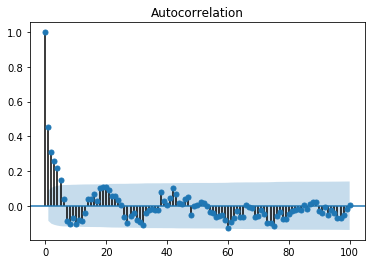

In [226]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lr.resid,lags=100)
acf.show()

# 1st order auto correlation is there is relation between immediate next residuals
# 2nd order auto correlation is there is relation between alternate residuals and so on ... 

# Durbin Watson is only used for 1st order auto correlation

# For more than 1 order upto 3rd order we use Breusch-Goldfrey test

# Assumption 2 - Normality between the Residuals

## This is done by checking the JB value ... 

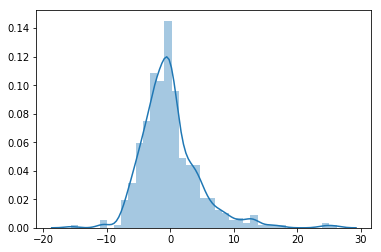

In [228]:
import seaborn as sns
sns.distplot(lr.resid)

In [230]:
from scipy import stats
stats.jarque_bera(lr.resid)

(783.1262780507654, 0.0)

## This JB value has to be less than 5.99 to prove that the residuals are normally distributed

# Removing Outliers in y

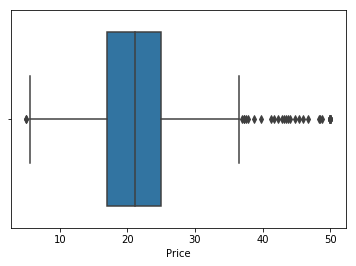

In [231]:
sns.boxplot(y)

In [258]:
q1 = bos.Price.quantile(0.25)
q3 = bos.Price.quantile(0.75)
IQR = q3-q1
uw = q3+(1.5*IQR)
lw = q1-(1.5*IQR)

In [259]:
bos.shape

(506, 14)

In [257]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [260]:
bos = bos[~((bos.Price>uw)|(bos.Price<lw))]
bos.shape

(466, 14)

In [261]:
x = bos.iloc[:,:-1]
y = bos['Price']

In [262]:
x_constant = sm.add_constant(x)
lr1 = sm.OLS(y,x_constant).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          8.05e-132
Time:                        12:06:22   Log-Likelihood:                -1194.8
No. Observations:                 466   AIC:                             2418.
Df Residuals:                     452   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4712      3.615     10.917      0.000      32.366      46.576
CRIM          -0.1025      0.024     -4.199      0.000      -0.151      -0.055
ZN             0.0384      0.010      3.746      0.000       0.018       0.059
INDUS         -0.0364      0.043     -0.845      0.399      -0.121       0.048
CHAS           1.0673      0.644      1.658      0.098      -0.198       2.332
NOX          -11.9055      2.624     -4.536      0.000     -17.063      -6.748
RM             1.8835      0.337      5.596      0.000       1.222       2.545
AGE           -0.0198      0.009     -2.127      0.034      -0.038      -0.002
DIS           -1.0161      0.141     -7.182      0.000      -1.294      -0.738
RAD            0.2289      0.046      4.998      0.000       0.139       0.319
TAX           -0.0121      0.003     -4.650      0.000      -0.017      -0.007
PTRATIO       -0.6986      0.092     -7.604      0.000      -0.879      -0.518
B              0.0073      0.002      3.979      0.000       0.004       0.011
LSTAT         -0.3769      0.037    -10.283      0.000      -0.449      -0.305
==============================================================================
Omnibus:                       47.427   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.848
Skew:                           0.686   Prob(JB):                     1.52e-16
Kurtosis:                       4.367   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
bos.shape

(466, 14)

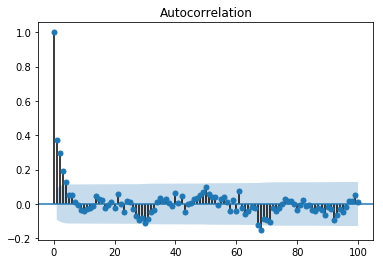

In [266]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lr1.resid,lags=100)
acf.show()

# Assumption 3 - Linearity between Residuals

### Using Plot

In [278]:
fitted_values = lr.predict()
resids = lr.resid

Text(0.5, 1.0, 'Predicted vs Actual')

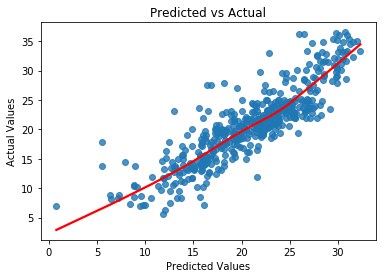

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = fitted_values, y = y, lowess= True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Predicted vs Residual')

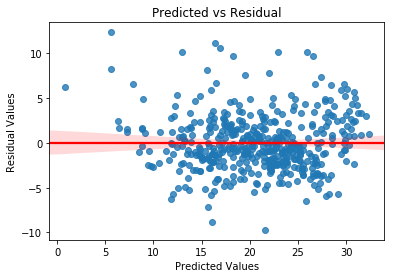

In [285]:
sns.regplot(x=fitted_values,y=resids,lowess=False,line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Predicted vs Residual')

## From the above graph it is clear that the data is Homo Scedastic with respect to the Line as the points are evenly distributed.

Text(0.5, 1.0, 'Predicted vs Residual')

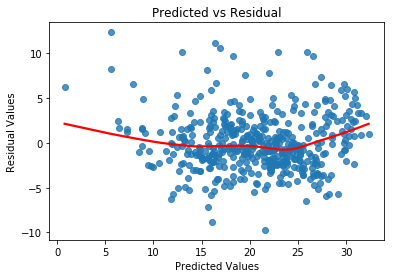

In [286]:
sns.regplot(x=fitted_values,y=resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Predicted vs Residual')

# Rainbow Test

## Here the Null Hyp is H0: The residuals are linear and Ha : Residuals are Not Linear

In [287]:
sm.stats.diagnostic.linear_rainbow(res=lr)

(1.1210141831584162, 0.19622520312529843)

### As the p value is > 0.05 hence the null hyp is accepted ... Hence the residuals are linear

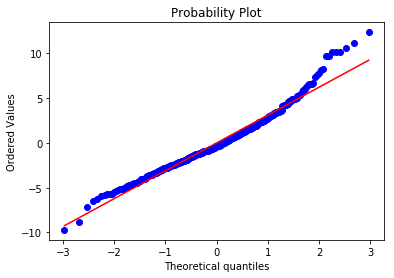

In [291]:
stats.probplot(resids,dist='norm',plot=plt)
plt.show()

## The other way to check if residuals are linear or not ....

In [292]:
lr.resid.mean()

4.94673448602941e-14

## Since this value is almost 0 ... the residuals are linear 

# Assumption 4 - Homoscedasticity Test using Goldfeld Test or Beusch-Wagon Test

### Here the null Hyp is H0: The deviation of the points is evenly spread (Homo Scedasticity) and Ha : The deviation of the points is not evenly spread (Hetero Scedasticity)

In [301]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F-stat','p-val']
test = sms.het_goldfeldquandt(lr.resid,lr.model.exog)
lzip(name,test)

[('F-stat', 1.8244050319163616), ('p-val', 5.143989040345337e-06)]

### Here since p-val < 0.05 ... Null Hyp is rejected and hence the data is hetero scedastic

In [305]:
lr.model.exog

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# Assumption 5 - Multi Collinearity

### The typical acceptable value for VIF is 1 to 5

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=x.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.850629,2.357394,3.90505,1.070815,4.335213,1.718213,3.119383,4.127129,7.402633,8.721134,1.640866,1.375674,2.949962


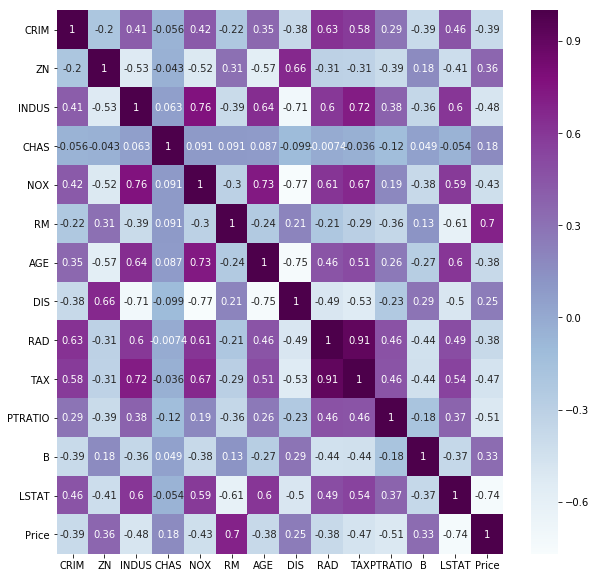

In [324]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bos.corr(),annot=True,cmap='BuPu',ax=ax)

In [325]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [328]:
df = x_constant.drop('TAX',axis=1)
df.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [332]:
df.shape

(466, 13)

In [334]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
pd.DataFrame({'vif':vif[0:]},index=df.columns).T

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,592.334801,1.850011,2.219711,3.259702,1.050296,4.310836,1.714823,3.117123,4.126279,2.837421,1.630382,1.374688,2.949949
